In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import logging

logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled = True

from time_series_gpt.models.Monte_Carlo.prophet import ProphetMeta
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools

[*********************100%%**********************]  1 of 1 completed

Getting info for ticker NVDA...


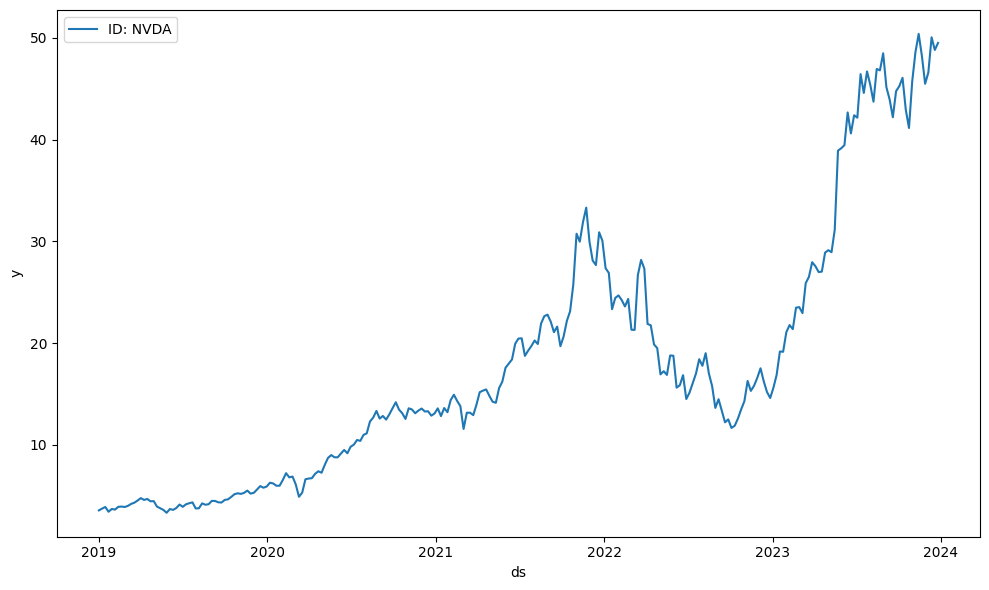

In [14]:
# Cargar datos y preprocesarlos
tickers = ['NVDA']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2019-01-01', end_date='2023-12-31', interval='1wk')
info = loader.get_info_ticker()

ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')

# Graficar los datos
ts_tools.plot_ts(ts)

In [15]:
prophet = False

horizon= 3
freq= 'W'

model = ProphetMeta (ts_data=ts)
model.train_and_evaluate()
ts_forecast = model.predict(horizon=horizon, freq=freq)
result_metric = model.get_results()

Processing NVDA...
Finished processing NVDA.


In [16]:
ts_forecast

,unique_id,ds,yhat,yhat_lower,yhat_upper
0,NVDA,2019-01-01,3.555960,2.044363,5.065009
1,NVDA,2019-01-08,4.249390,2.539558,5.901676
2,NVDA,2019-01-15,3.663174,1.941270,5.340296
3,NVDA,2019-01-22,3.915376,2.360058,5.656160
4,NVDA,2019-01-29,3.774193,2.112700,5.380767
...,...,...,...,...,...
259,NVDA,2023-12-19,50.053653,48.345345,51.617350
260,NVDA,2023-12-26,51.031924,49.377033,52.651474
261,NVDA,2023-12-31,51.045668,49.425694,52.746433
262,NVDA,2024-01-07,51.264009,49.628442,52.915472


In [17]:
result_metric

,unique_id,SMAPE Error,MAPE Error,Accuracy
0,NVDA,0.073147,0.074283,92.685336


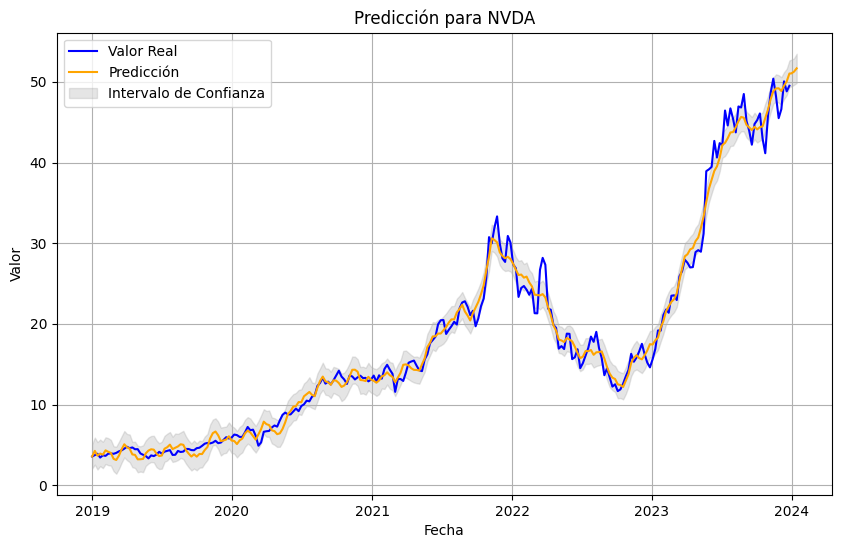

In [18]:
# Función para graficar el pronóstico junto con los valores reales
def plot_forecast(ts_data, ts_forecast):
    unique_ids = ts_forecast['unique_id'].unique()
    
    for unique_id in unique_ids:
        forecast_data = ts_forecast[ts_forecast['unique_id'] == unique_id]
        actual_data = ts_data[ts_data['unique_id'] == unique_id]
        
        plt.figure(figsize=(10, 6))
        
        # Graficar los valores reales
        plt.plot(actual_data['ds'], actual_data['y'], label='Valor Real', color='blue')
        
        # Graficar las predicciones
        plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicción', color='orange')
        
        # Rellenar el intervalo de confianza
        plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                         color='gray', alpha=0.2, label='Intervalo de Confianza')
        
        plt.title(f'Predicción para {unique_id}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_forecast(ts, ts_forecast)